As the rise of the influence of social media in recent elections, it is important to veritfy the source and veracity of the information to shield ourselves from political agendas.

This model serves the purpose to predict the potential of said news headline to be incorrect, misleading or triggering, caracterizing it as fake news or not.

Using the well-known python module called sklearn, we will build a TfidVectorizer on our dataset an then initialize a PassiveAggressive Classifier to fit our model in.

TF - Term Frequency: Number of times a word appears in a document. The larger the number, the more often it appears on it.

IDF - Inverse Document Frequency: Words that occur many times in a specific document, but also occur many times in many others, may be irrelevant. IDF measures how significant the term is in the entire corpus.

PassiveAggressiveClassifier: Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

To measure our model's performance we will use the accuracy score and the confusion matrix.
The accuracy score is a number from 0 to 1 that measures how well our model fitted our data. The confusion matrix takes in consideration false positives and false negatives as well as true positives and true negatives.

Our dataset has 5 columns: ID, Author, Title, Text and Label, which classifies it as reliable(0) or unreliable(1).

Source: https://www.kaggle.com/c/fake-news/data

So let's begin by imoorting all libraries need for this project.

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Reading the data into a Pandas Dataframe and visualizing the 5 first records
data = pd.read_csv('train.csv')
data_pred = pd.read_csv('test.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
# Initializing a TfidfVectorizer: Words with document frequency higher than 0.7 will be discarded
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Splitting the dataset - 70% train
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)

# Fitting and transforming train and test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype(str)) 
tfidf_test = tfidf_vectorizer.transform(X_test.values.astype(str))

In [4]:
# Initializing a PassiveAggressiveClassifier and fitting test set
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

#Predicting on the test set and calculating accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score, 4)}%')

Accuracy: 0.9571%


Now with our Accuracy of <b>95,71%</b> obtained, it's time for us to build the confusion matrix

In [5]:
confusion_matrix(y_test, y_pred)

array([[3023,  125],
       [ 143, 2949]], dtype=int64)

#### With our results from the confusion matrix, we have:

3023 true positives - Real news

2949 true negatives - Fake news

143 false positives - Fake news considered Real News

125 false negatives - Real news considered Fake News

Now let's use our second data set, which doesn't have the label to make predctions.

In [6]:
X_news = data_pred['text']
tfidf_pred = tfidf_vectorizer.transform(X_news.values.astype(str))
y_news_pred = pac.predict(tfidf_pred)

In [7]:
pred = pd.DataFrame()
pred['ID'] = data_pred['id']
pred['text'] = data_pred['text']
pred['Label'] = y_news_pred

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
pred
# 0 - Real / 1 - Fake

,ID,text,Label
0,20800,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,1
2,20802,Videos #NoDAPL: Native American Leaders Vow to...,1
3,20803,"If at first you don’t succeed, try a different...",0
4,20804,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
5,20805,Trump is USA's antique hero. Clinton will be n...,1
6,20806,"Sunday on NBC’s “Meet the Press,” House Minori...",0
7,20807,You are here: Home / *Articles of the Bound* /...,1
8,20808,Urban Population Booms Will Make Climate Chang...,1
9,20809,don't we have the receipt?,1


In [8]:
pred = pred.drop('text', 1)
pred.to_csv('submit.csv', index = False)

After submitting our results to the Kaggle page, we got the following score:

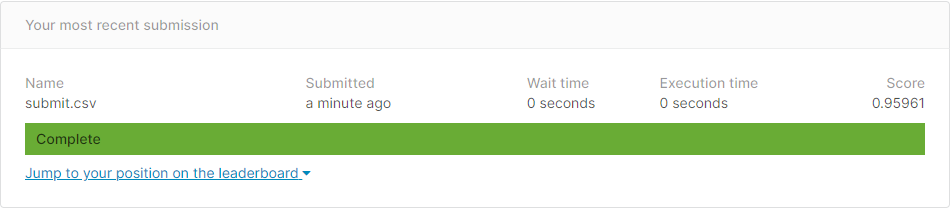

Since the competition was already closed, our score was not available on the leaderboard, but our result would place us at 7th place.

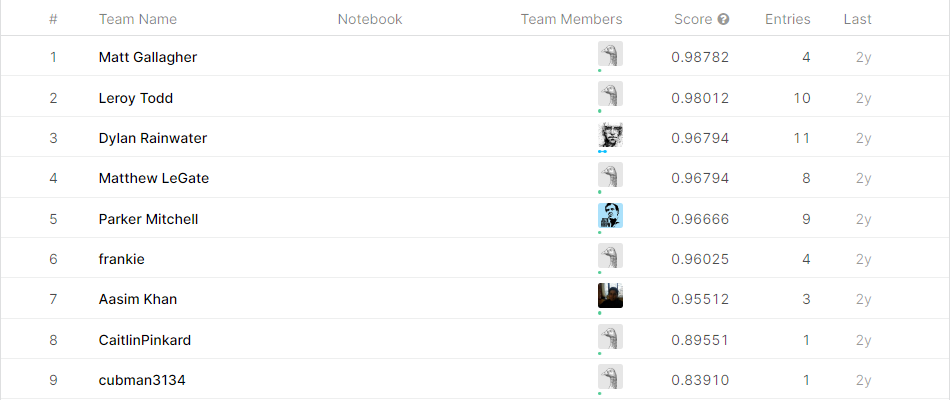

Feel free to leave any comments on improvement points and tips. Thank you!